In [5]:
#Importing Pandas library
import pandas as pd
#Importing Seaborn library
import seaborn as sns
#Importing Matplotlib's pyplot library
from matplotlib import pyplot as plt

In [11]:
#Importing CSV file and storing it in DataFrame name 'life_expectancy_gdp'
life_expectancy_gdp=pd.read_csv('all_data.csv')

In [13]:
#Displaying the DataFrame column names and first five rows
life_expectancy_gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [21]:
#Finding the number of observations (96) and how many columns(4)
life_expectancy_gdp.shape

(96, 4)

In [27]:
#Printing a list of the unique "Country" values
print(life_expectancy_gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [29]:
#Printing a list of unique "Year" values
print(life_expectancy_gdp.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [71]:
#Renaming the "Life expectancy at birth (years)" column as LEBnY
life_expectancy_gdp=life_expectancy_gdp.rename({"Life expectancy at birth (years)":"LEBnY"}, axis = "columns")

#Checking to make sure column name has changed
life_expectancy_gdp.head()

,Country,Year,LEBnY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


<Figure size 800x600 with 0 Axes>

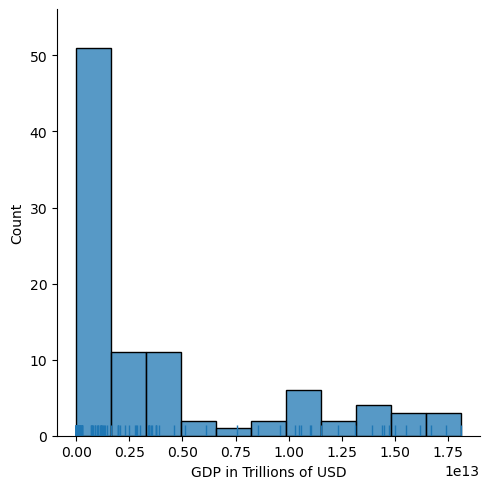

In [45]:
#Creating a figure with size (800x600)
plt.figure(figsize=(8,6))

#Distribution plot of GDP with parameters: marginal ticks shown and where kernel density estimate bool is false
sns.displot(life_expectancy_gdp.GDP,rug=True,kde=False)

#Labeling X-axis label
plt.xlabel("GDP in Trillions of USD");

Text(0.5, 9.444444444444438, 'Life Expectancy at Birth (Years)')

<Figure size 800x600 with 0 Axes>

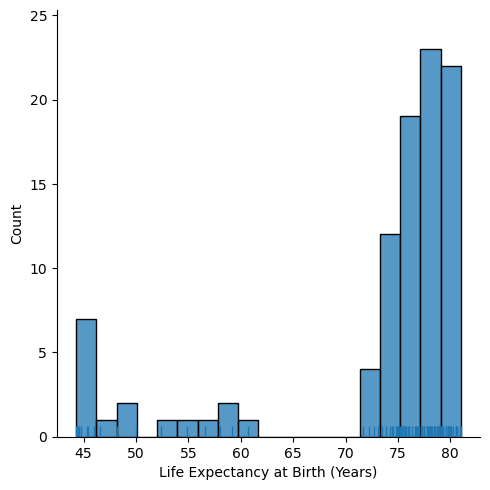

In [75]:
#Creating a figure with size 800x600
plt.figure(figsize=(8,6))

#Distribution plot of DataFrames 'Life Expectancy at Birth (Years)' a.k.a LEBnY column
#Parameters set with marginal ticks shown and kernel density estimate bool set to False
sns.displot(life_expectancy_gdp.LEBnY, rug=True, kde=False)

#Labeling X-axis 
plt.xlabel("Life Expectancy at Birth (Years)")

In [77]:
#Creating a new DataFrame where the "Year" column is removed
#Grouping by the observations of each "Country"
#Finding the mean of the dataset
#Resetting index to have default indices
LEGmean=life_expectancy_gdp.drop("Year", axis = 1).groupby("Country").mean().reset_index()

#Displaying the output of the new DataFrame
LEGmean

,Country,LEBnY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


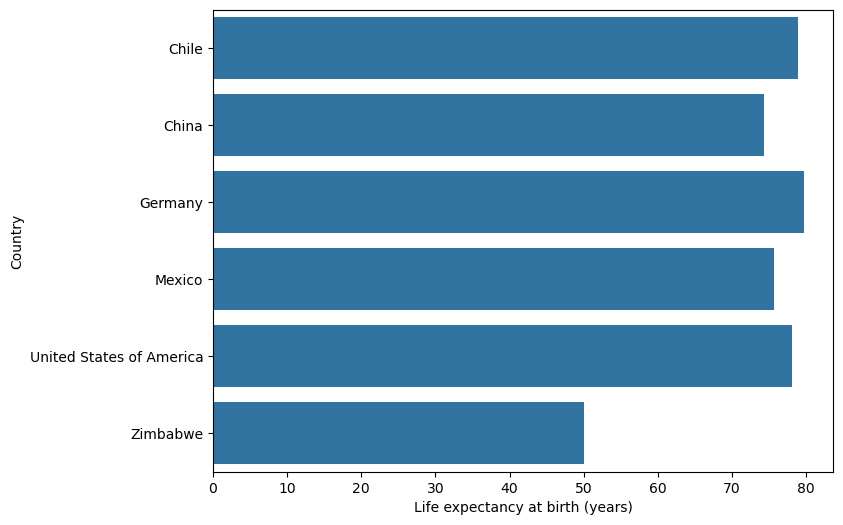

In [83]:
#Creating a figure sized 800x600
plt.figure(figsize=(8,6))

#Creating a barplot with LEGmean DataFrame
#"Life Expectancy at Birth (years)" on the X-axis
#"Country" on the Y-axis
sns.barplot(x="LEBnY", y="Country", data=LEGmean)

#Labeling the X-axis 
plt.xlabel("Life expectancy at birth (years)");

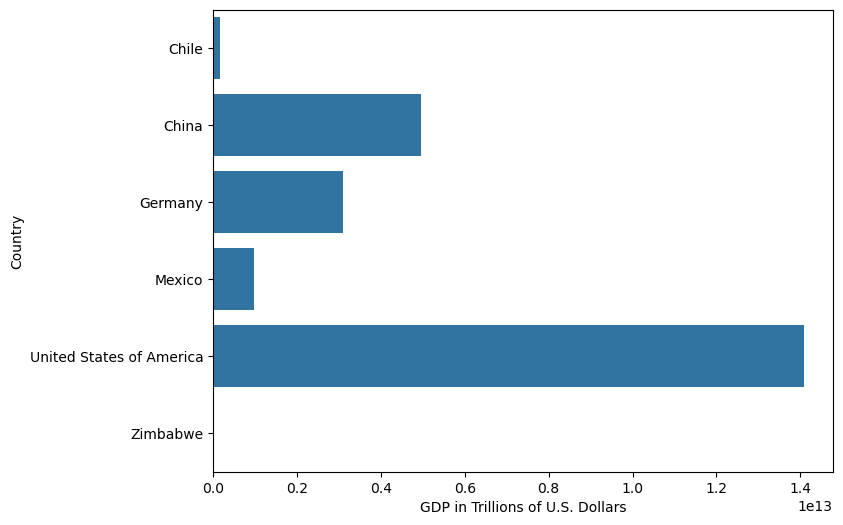

In [85]:
#Creating a figure
plt.figure(figsize=(8,6))

#Creating Bar plot with LEGmean DataFrame
#Setting X-axis as "GDP"
#Setting Y-axis as "Country"
sns.barplot(x="GDP", y="Country", data=LEGmean)

#Labeling X-axis
plt.xlabel("GDP in Trillions of U.S. Dollars");

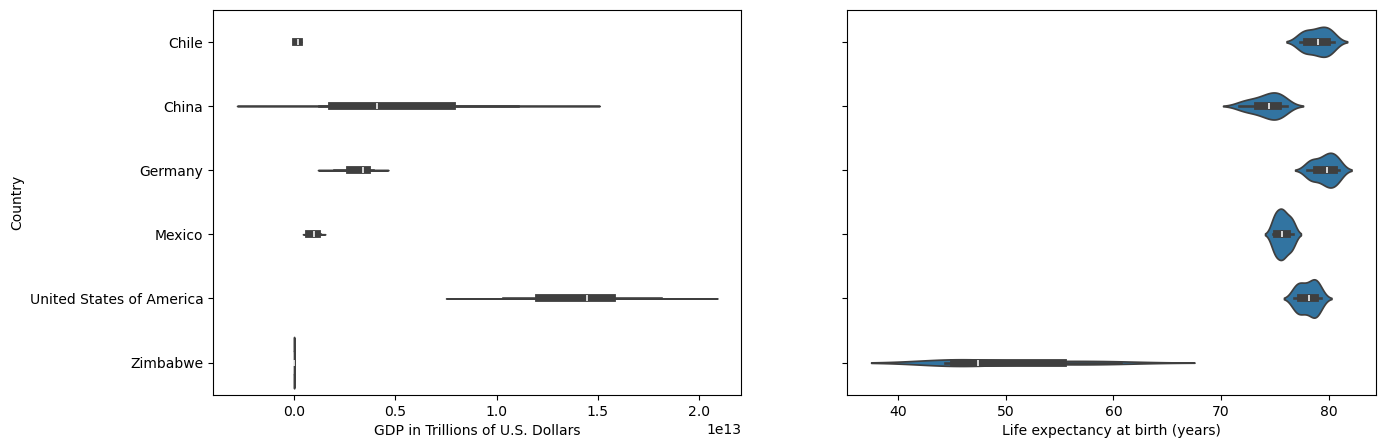

In [88]:
#Creating 2 plots on the same figure where the figures share values on the Y-axes
ig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

#Where the first (Matplotlib) axes object is drawn, X-axis is GDP, Y-axis is Country
axes[0] = sns.violinplot(ax=axes[0], x=life_expectancy_gdp.GDP, y=life_expectancy_gdp.Country)

#Setting X-axis label
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")

#Where the second(Matplotlib) axes object is drawn: X-axis= "Life Expectancy at Birth (Years)", Y-axis= "Country"
axes[1] = sns.violinplot(ax=axes[1], x=life_expectancy_gdp.LEBnY, y=life_expectancy_gdp.Country)

#Setting X-axis label
axes[1].set_xlabel("Life expectancy at birth (years)");

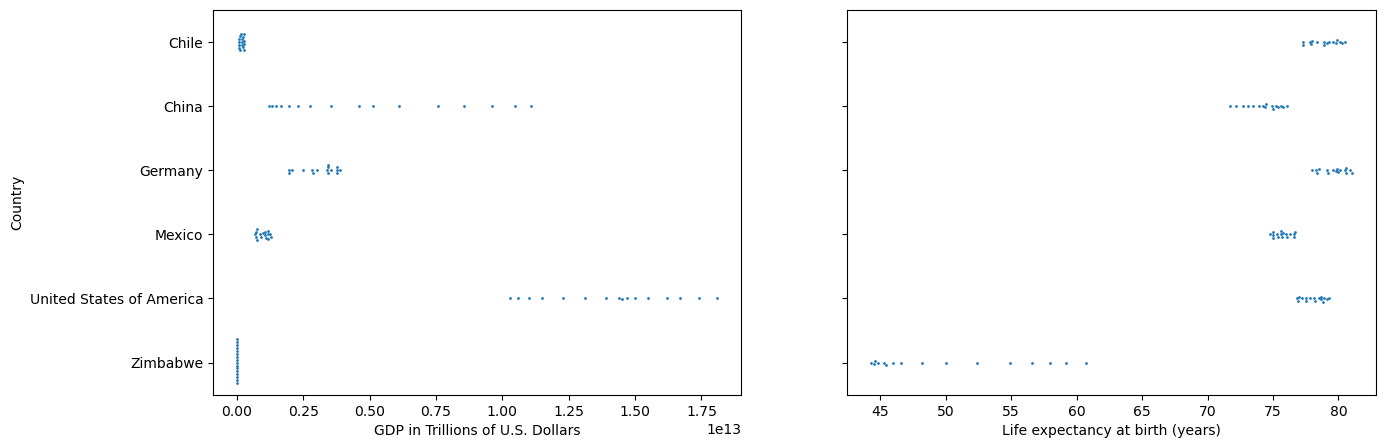

In [150]:
#Creating 2 subplots on one figure sharing the y-values
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

#Creating the first swarmplot where: X-axis = "GDP", Y-axis = "Country", and size is reduced to 2 to fit all points
axes[0] = sns.swarmplot(ax=axes[0], x=life_expectancy_gdp.GDP, y=life_expectancy_gdp.Country,size=2)

#Labeling X-axis
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")

#Creating the second swarmplot where: X-axis = "Life Expectancy at Birth (Years)", Y-axis = "Country, and size reduced to 2 to fit all points
axes[1] = sns.swarmplot(ax=axes[1], x=life_expectancy_gdp.LEBnY, y=life_expectancy_gdp.Country,size=2)

#Labeling X-axis
axes[1].set_xlabel("Life expectancy at birth (years)");

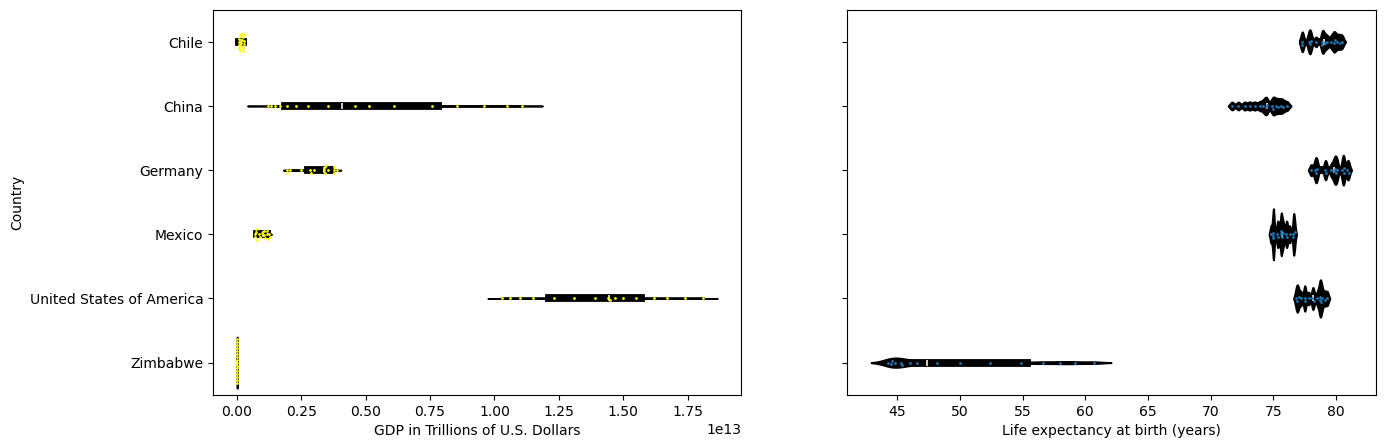

In [154]:
#Return and fix Bandwidth

#Creating a figure with 2 subplots that share the same y-values
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

#First subplots violin and swarmplot ontop of one another
#X-axis= "GDP", Y-axis= "Country" with black color (violinplot) & yellow color (swarmplot), and bandwidth adjusted to fit all points
#Labeling X-axis
axes[0] = sns.violinplot(ax=axes[0], x=life_expectancy_gdp.GDP, y=life_expectancy_gdp.Country,color = "black",bw_adjust=.2)
axes[0] = sns.swarmplot(ax=axes[0], x=life_expectancy_gdp.GDP, y=life_expectancy_gdp.Country,color="yellow",size=2)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")

#Second subplots violin and swarmplot ontop of one another
#X-axis="Life Expectancy at Birth (Years)", black color violinplot, and bandwidth adjusted to fit all points
#Labeling X-axis
axes[1] = sns.violinplot(ax=axes[1], x=life_expectancy_gdp.LEBnY, y=life_expectancy_gdp.Country, color = "black",bw_adjust=.2)
axes[1] = sns.swarmplot(ax=axes[1], x=life_expectancy_gdp.LEBnY, y=life_expectancy_gdp.Country,size=2)
axes[1].set_xlabel("Life expectancy at birth (years)");

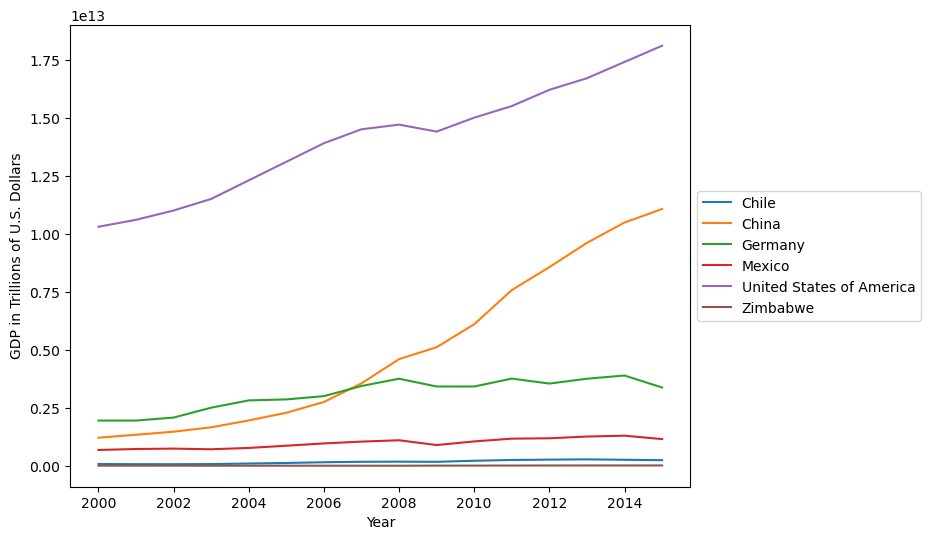

In [156]:
#Creating a figure
plt.figure(figsize=(8,6))

#Creating lineplot where X-axis= "Year", Y-axis= "GDP", hue grouping variable "Country"
sns.lineplot(x=life_expectancy_gdp.Year, y=life_expectancy_gdp.GDP, hue=life_expectancy_gdp.Country)

#Creating a label in the 'center left' position with a specified location (bbox_to_anchor), and 1 column
#Creating Y-axis label
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

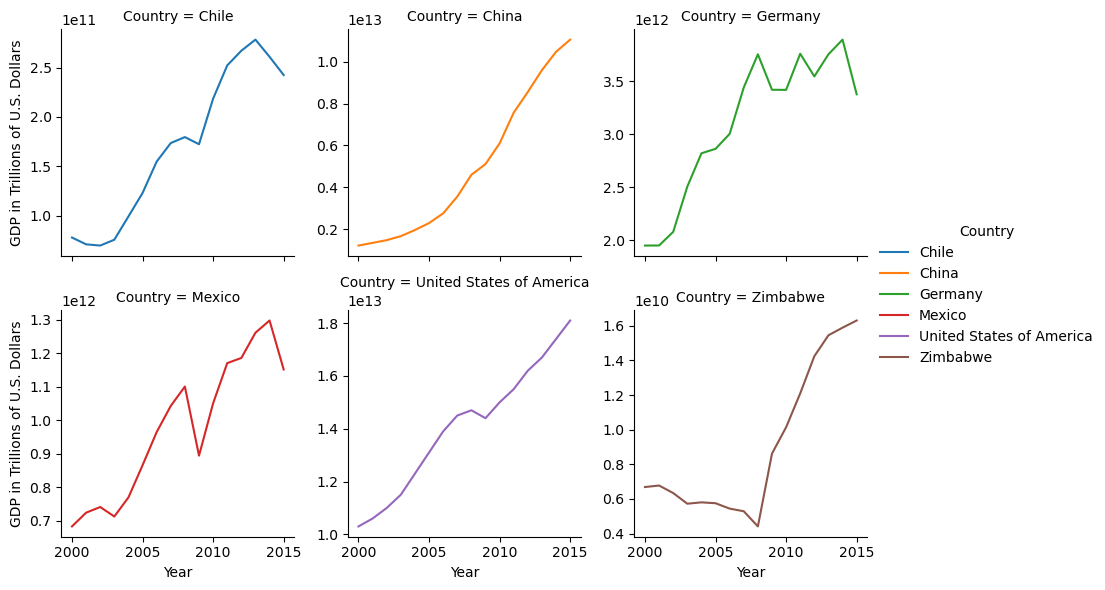

In [158]:
#Creating facetgrid for DataFrame's "Country" columns, the column variable wrap at width= 3 spanning multiple rows
#Hue/Color set by "Country" and sharing y-values
graphGDP = sns.FacetGrid(life_expectancy_gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

#Mapping lineplots with DataFrame's "Year" & "GDP" values, adding a legend and setting x and y axis labels to respective sides
graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

#Showing graph
graphGDP;

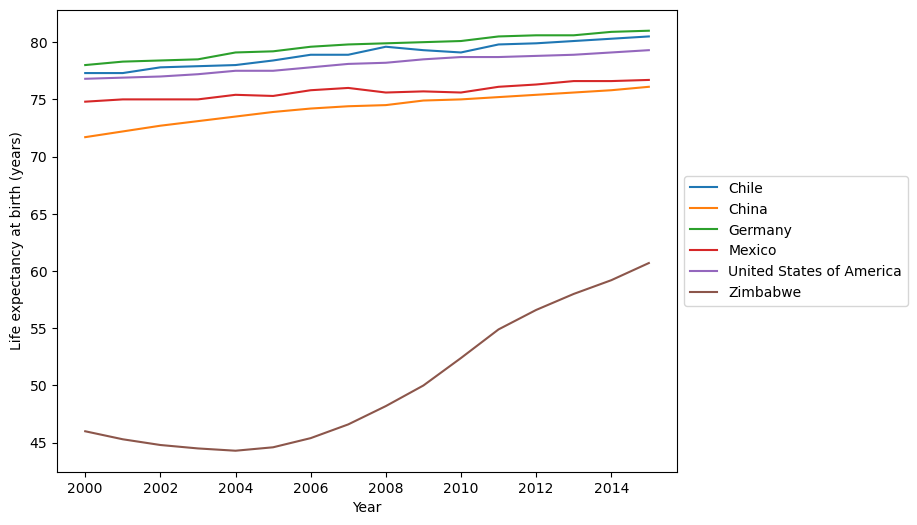

In [162]:
#Creating figure
plt.figure(figsize=(8,6))

#Creating lineplot with X-axis = "Year", Y-axis = "Life Expectancy at Birth (Years)", hue grouping by "Country"
sns.lineplot(x=life_expectancy_gdp.Year, y=life_expectancy_gdp.LEBnY, hue=life_expectancy_gdp.Country)

#Creating legend in 'center left' position of specified location with 1 column
#Labeling Y-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


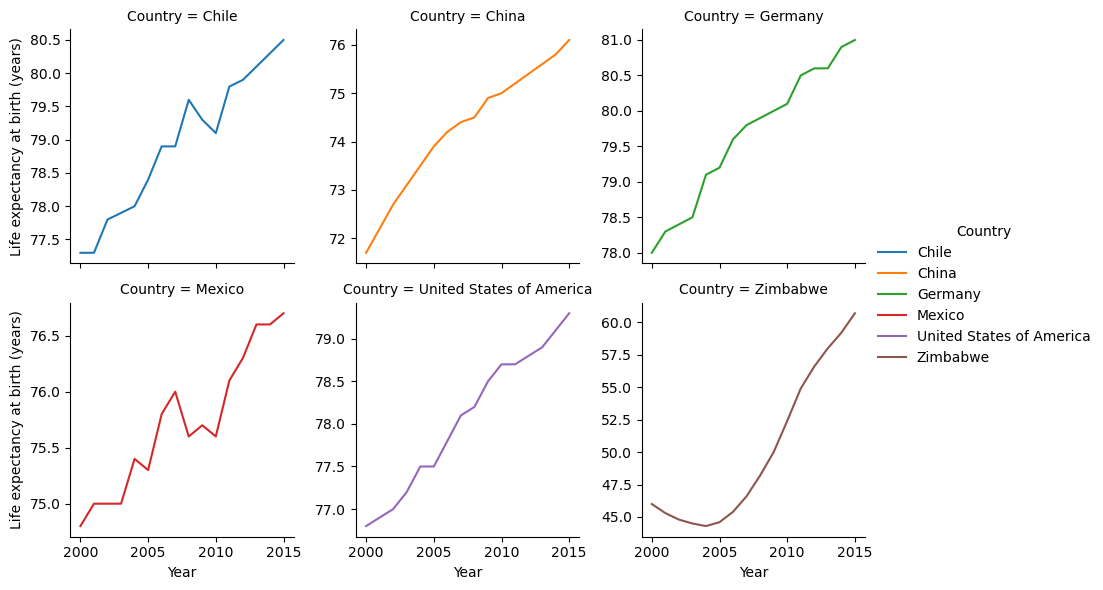

In [164]:
#Creating facet grid with "Country" columns and column variable wrap at width= 3 spanning multiple rows
#Hue/Color set by "Country" and NOT sharing Y-values
graphLEBnY = sns.FacetGrid(life_expectancy_gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

#Creating lineplot inside facet grid with "Year" on the x-axis and "Life Expectancy at Birth (Years)" on the y-axis
#Adding Legend
#Setting X-axis to "Year" and Y-axis to "Life expectancy at birth(years)"
graphLEBnY = (graphLEBnY.map(sns.lineplot,"Year","LEBnY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

#Displaying Graph
graphLEBnY;

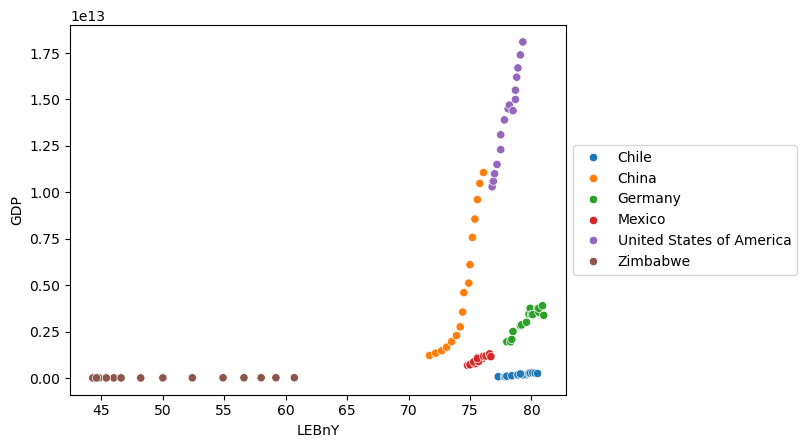

In [170]:
#Creating a scatterplot with X-axis= "Life Expected at Birth (Years)", Y-axis="GDP", hue grouping by "Country"
#Creating lengend in custom 'center left' position with 1 column
sns.scatterplot(x=life_expectancy_gdp.LEBnY, y=life_expectancy_gdp.GDP, hue=life_expectancy_gdp.Country).legend\
(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

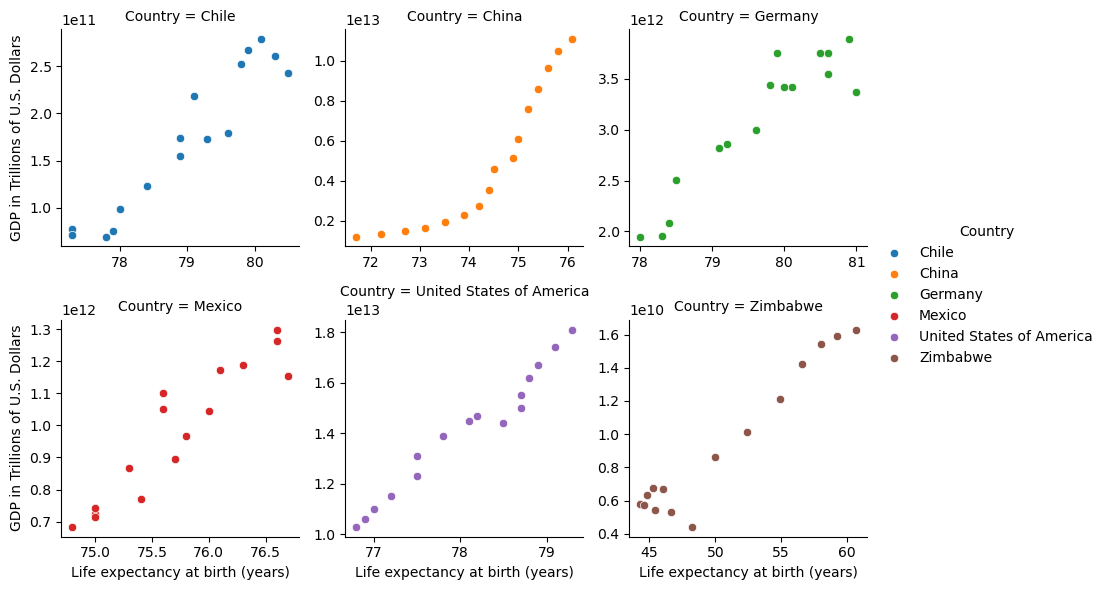

In [172]:
#Creating facet grid with "Country" columns and column variable wrap at width= 3 spanning multiple rows
#Hue/Color by "Country", NOT sharing y-values, and NOT sharing x-values
graph = sns.FacetGrid(life_expectancy_gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

#Creating scatterplot with "Life Expectancy at Birth (Years)" and "GDP"
#Adding legend
#Setting axis labels X="Life expectancy at birth (years) and Y="GDP in Trillions of U.S. Dollars")
graph = (graph.map(sns.scatterplot,"LEBnY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));